<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP02c_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 2 : Corrigé


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Pour la régression Ridge
from sklearn.linear_model import Ridge
# Pour séparer les datasets et la recherche des hyperparamètres
from sklearn.model_selection import train_test_split, GridSearchCV
# Pour faire des scores (l'opposé des fonctions de pertes) lisibles par sklearn
from sklearn.metrics import make_scorer

{'alpha': 0.15151515151515152}
0.3919623878514081


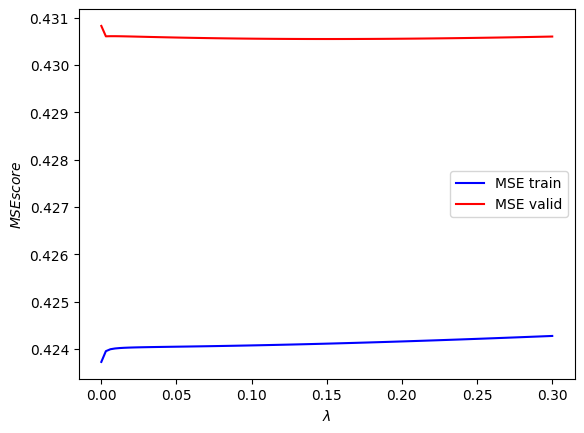

In [3]:
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP2/winequality-red.csv"
# Pour les blancs
#file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP2/winequality-white.csv"
wine_data = pd.read_csv(file_path, sep=";")
wine_data

# Séparation des variables
outputs = wine_data["quality"]
inputs = wine_data.drop(["quality"], axis=1)

# Séparation du jeu de données
inputs_train_val, inputs_test, outputs_train_val, outputs_test = \
  train_test_split(inputs, outputs, test_size=0.2)

# Création du score MSE
def mse_loss(outputs_true, outputs_pred):
  return np.mean((outputs_true - outputs_pred)**2)
mse_score = make_scorer(mse_loss, greater_is_better=False)

# Recherche de l'hyperparamètre
ridge = Ridge()
hyps = np.linspace(0, 0.3, 100)
k = 5
param_dict = {"alpha": hyps}
gride_search = GridSearchCV(ridge,
                            param_dict,
                            scoring=mse_score,
                            cv=k,
                            return_train_score=True)
gride_search.fit(inputs_train_val, outputs_train_val)

# Le meilleur paramètre
print(gride_search.best_params_)

# Le graphique
train_score = gride_search.cv_results_["mean_train_score"]
val_score = gride_search.cv_results_["mean_test_score"]
fig, ax = plt.subplots()
ax.plot(hyps, -train_score, c="blue", label="MSE train")
ax.plot(hyps, -val_score, c="red", label="MSE valid")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("$MSE score$")
ax.legend()
plt.plot()

# L'erreur de généralisation
outputs_pred = gride_search.best_estimator_.predict(inputs_test)
MSE_test = np.mean((outputs_test - outputs_pred)**2)
print(MSE_test)